<a href="https://colab.research.google.com/github/Parul30163/python/blob/main/internshala6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
tf =pd.read_csv('/content/Raw_Housing_Prices3.csv')

In [3]:
tf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [4]:
tf.drop(columns ='ID',inplace=True)

In [5]:
tf['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [6]:
tf['Condition of the House'].value_counts()

Condition of the House
Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition of the House'>

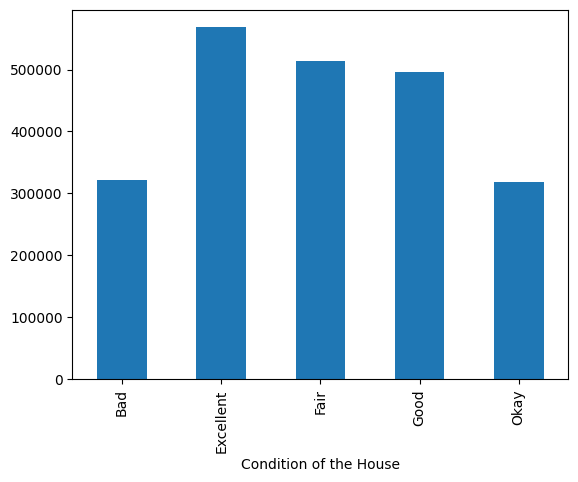

In [7]:
tf.groupby('Condition of the House')['Sale Price'].mean().plot(kind ='bar')

<Axes: xlabel='Condition of the House'>

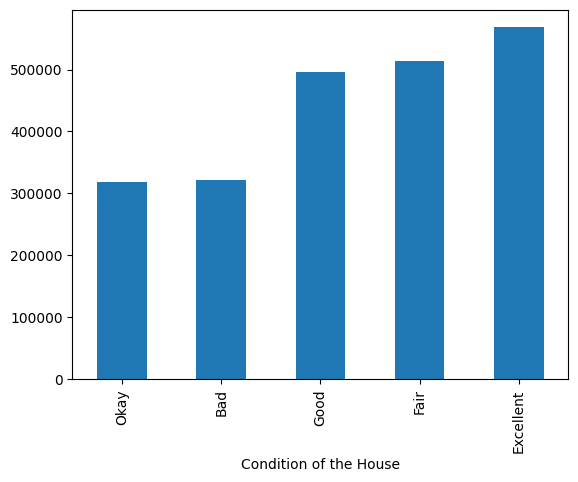

In [9]:
tf.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind ='bar')

<Axes: xlabel='Waterfront View'>

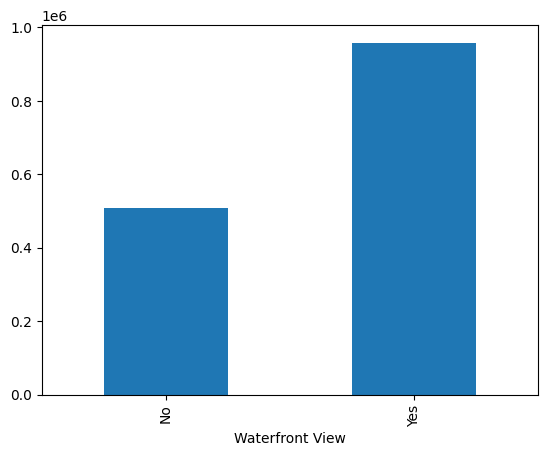

In [11]:
tf.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind ='bar')

In [15]:
#tf.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind ='bar')

<Axes: xlabel='Zipcode'>

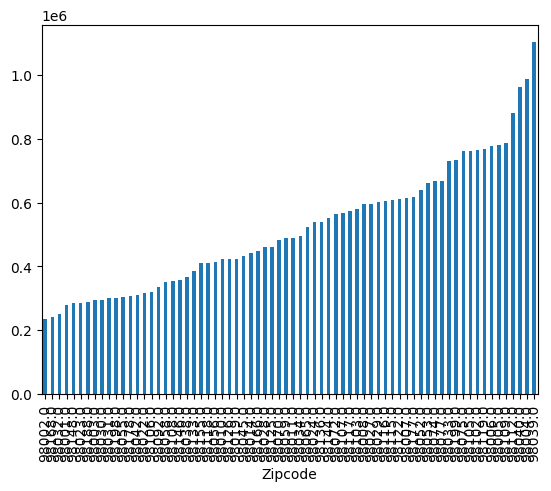

In [16]:
tf.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind ='bar')

In [17]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [18]:
tf =tf.rename(columns={'Sale Price': 'Sale_Price'})

In [19]:
tf =tf.rename(columns={'Condition of the House': 'Condition_of_the_House'})

In [20]:
tf =tf.rename(columns={'Ever Renovated': 'Ever_Renovated'})

In [21]:
tf =tf.rename(columns={'Waterfront View': 'Waterfront_View'})

In [22]:
tf.head()

,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [23]:
tf['Waterfront_View'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
mod =ols('Sale_Price ~ Condition_of_the_House',data=tf).fit()

In [29]:
Anova_Table =sm.stats.anova_lm(mod,typ=2)

In [30]:
print(Anova_Table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [31]:
mod =ols('Sale_Price ~ Waterfront_View',data =tf).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [33]:
#mod =ols('Sale_Price ~ Ever_Renovated',data =tf).fit()
#sm.stats.anova_lm(mod,typ=2)

In [34]:
mod =ols('Sale_Price ~ Zipcode',data =tf).fit()
sm.stats.anova_lm(mod,typ=2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


In [35]:
tf.head()

,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [38]:
#tf =pd.get_dummies(tf,columns=['Ever _Renovated','Waterfront_View'],
 #                  drop_first =True)

In [40]:
#Binning

In [41]:
Zip_Table =tf.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)

In [42]:
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [46]:
Zip_Table['Zipcode_Group']=pd.cut(Zip_Table['Sale_Price'],bins=10,
                                  labels=['Zipcode_Group_0',
                                          'Zipcode_Group_1',
                                          'Zipcode_Group_2',
                                          'Zipcode_Group_3',
                                          'Zipcode_Group_4',
                                          'Zipcode_Group_5',
                                          'Zipcode_Group_6',
                                          'Zipcode_Group_7',
                                          'Zipcode_Group_8',
                                          'Zipcode_Group_9'],
                                    include_lowest=True)

In [47]:
Zip_Table =Zip_Table.drop(columns='Sale_Price')

In [48]:
tf=pd.merge(tf,Zip_Table,
            left_on='Zipcode',
            how='left',
            right_index =True)

In [49]:
tf=tf.drop(columns='Zipcode')

In [51]:
tf.head()

,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Zipcode_Group
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,1180.0,0,63,0,47.5112,-122.257,1340.0,5650,Zipcode_Group_0
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,2170.0,400,67,1991,47.7210,-122.319,1690.0,7639,Zipcode_Group_2
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,770.0,0,85,0,47.7379,-122.233,2720.0,8062,Zipcode_Group_2
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,1050.0,910,53,0,47.5208,-122.393,1360.0,5000,Zipcode_Group_3
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,1680.0,0,31,0,47.6168,-122.045,1800.0,7503,Zipcode_Group_4


In [52]:
tf=pd.get_dummies(tf,columns=['Zipcode_Group'],
                  drop_first =True)

In [53]:
tf.head()

,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,...,Lot Area after Renovation (in Sqft),Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,...,5650,False,False,False,False,False,False,False,False,False
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,...,7639,False,True,False,False,False,False,False,False,False
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,...,8062,False,True,False,False,False,False,False,False,False
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,...,5000,False,False,True,False,False,False,False,False,False
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,...,7503,False,False,False,True,False,False,False,False,False


In [54]:
tf.head(10)

,Date House was Sold,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,...,Lot Area after Renovation (in Sqft),Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,...,5650,False,False,False,False,False,False,False,False,False
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,...,7639,False,True,False,False,False,False,False,False,False
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,...,8062,False,True,False,False,False,False,False,False,False
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,...,5000,False,False,True,False,False,False,False,False,False
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,...,7503,False,False,False,True,False,False,False,False,False
5,14 May 2017,1129575.0,4,4.50,5420.0,101930.0,1.0,No,NaN,Fair,...,101930,False,False,False,True,False,False,False,False,False
6,14 June 2017,257500.0,3,2.25,1715.0,6819.0,2.0,No,NaN,Fair,...,6819,False,False,False,False,False,False,False,False,False
7,15 January 2016,291850.0,3,1.50,1060.0,9711.0,1.0,No,NaN,Fair,...,9711,False,False,False,False,False,False,False,False,False
8,15 April 2016,229500.0,3,1.00,1780.0,7470.0,1.0,No,NaN,Fair,...,8113,True,False,False,False,False,False,False,False,False
9,15 March 2016,323000.0,3,2.50,1890.0,6560.0,2.0,No,NaN,Fair,...,7570,True,False,False,False,False,False,False,False,False


In [56]:

Y=tf.iloc[:,0]
X=tf.iloc[:,1:31]

In [57]:
X.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,...,Lot Area after Renovation (in Sqft),Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7,...,5650,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7,...,7639,False,True,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,6,...,8062,False,True,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7,...,5000,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8,...,7503,False,False,False,True,False,False,False,False,False


In [58]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [64]:
X_train.shape

(15126, 27)

In [65]:
X_test.shape

(6483, 27)

In [66]:
Y_train.shape

(15126,)

In [67]:
Y_test.shape

(6483,)

In [68]:
X.describe()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,5.116186e+05,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,7.623490,1788.319589,291.513490,46.999722,84.417881,47.560050,-122.213875,1986.553242,12769.770790
std,2.500620e+05,0.929916,0.770097,918.347816,4.142353e+04,0.539909,1.105519,827.977604,442.570991,29.373317,401.714775,0.138556,0.140832,685.427485,27306.508841
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,47.678000,-122.125000,2360.000000,10084.000000
max,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [69]:
#Standardisation

In [70]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [75]:
#X_train =scale.fit_transform(X_train)

In [76]:
#X_train

In [77]:
#X_test =scale.fit_transform(X_test)

In [78]:
#X_test